# Dependences

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [23]:
df = pd.read_csv(r"C:\\Users\\Hemant\\Desktop\\Shopping Behavior\\Dataset\\shopping_behavior.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [24]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [26]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [27]:
df.value_counts().sum()

3900

In [28]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df['Purchase Amount (USD)'].kurtosis()

-1.236593691266159

In [31]:
# ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
    #    'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
    #    'Review Rating', 'Subscription Status', 'Shipping Type',
    #    'Discount Applied', 'Promo Code Used', 'Previous Purchases',
    #    'Payment Method', 'Frequency of Purchases']

print("Value count of Item Purchased: " ,df['Item Purchased'].value_counts())
print()
print("Value count of Category: " ,df['Category'].value_counts())
print()
print("Value count of Size: " ,df['Size'].value_counts())
print()
print("Value count of Color: " ,df['Color'].value_counts())
print()
print("Value count of Shipping Type: " ,df['Shipping Type'].value_counts())
print()
print("Value count of Location: " ,df['Location'].value_counts())
print()
print("Value count of Payment Method: " ,df['Payment Method'].value_counts())
print()

Value count of Item Purchased:  Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Value count of Category:  Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Value count of Size:  Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

Value count of Color:  Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pin

<h1> Data Columns depencdences visualization

Seasonal perchased as per items demand

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


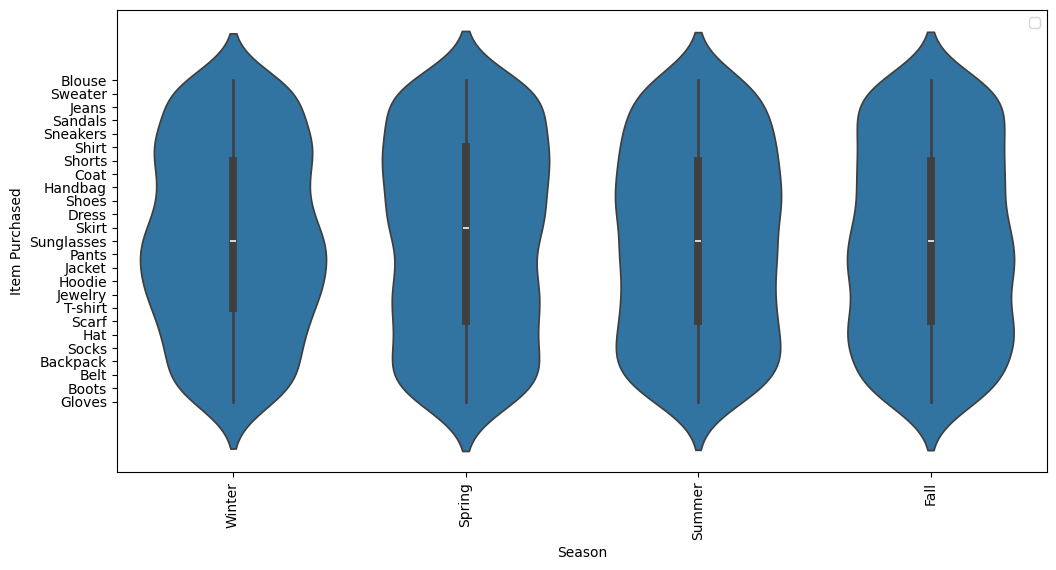

In [32]:
plt.figure(figsize=(12 , 6))
sns.violinplot(y = 'Item Purchased' , x = 'Season' , data = df)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

C:\Users\Hemant\AppData\Local\Temp\ipykernel_21536\689637511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Season', y='Review Rating', palette='pastel')


<Axes: xlabel='Season', ylabel='Review Rating'>

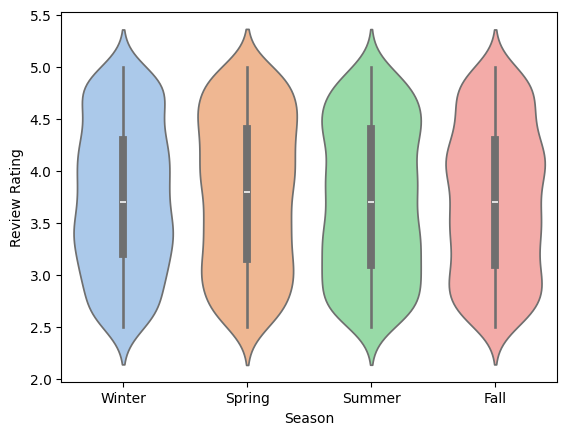

In [33]:
sns.violinplot(data=df, x='Season', y='Review Rating', palette='pastel')

***Average review ratings vary across different colors for the top 5 U.S. locations with the highest overall ratings.***

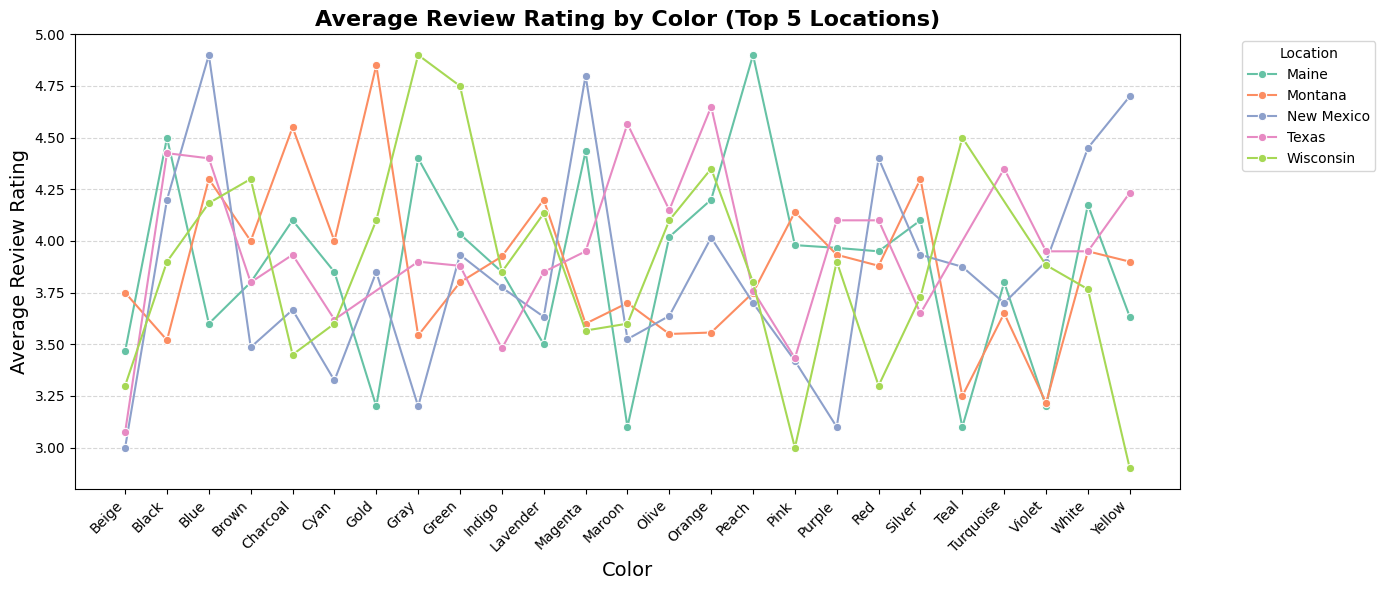

In [34]:
# Aggregate average ratings
df_grouped = df.groupby(['Color', 'Location'])['Review Rating'].mean().reset_index()

# Get top 5 locations by overall average rating
top_locations = (
    df_grouped.groupby('Location')['Review Rating']
    .mean()
    .nlargest(5)
    .index
)

df_top = df_grouped[df_grouped['Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top,
    x='Color',
    y='Review Rating',
    hue='Location',
    marker='o',
    palette='Set2'
)

plt.title('Average Review Rating by Color (Top 5 Locations)', fontsize=16, weight='bold')
plt.xlabel('Color', fontsize=14)
plt.ylabel('Average Review Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [35]:
location_counts = df.groupby('Location')['Item Purchased'].count()
average_price_by_location = df.groupby('Location')['Purchase Amount (USD)'].mean()

print("Location counts: " , location_counts)
print()
print("Average price by location: " , average_price_by_location)

Location counts:  Location
Alabama           89
Alaska            72
Arizona           65
Arkansas          79
California        95
Colorado          75
Connecticut       78
Delaware          86
Florida           68
Georgia           79
Hawaii            65
Idaho             93
Illinois          92
Indiana           79
Iowa              69
Kansas            63
Kentucky          79
Louisiana         84
Maine             77
Maryland          86
Massachusetts     72
Michigan          73
Minnesota         88
Mississippi       80
Missouri          81
Montana           96
Nebraska          87
Nevada            87
New Hampshire     71
New Jersey        67
New Mexico        81
New York          87
North Carolina    78
North Dakota      83
Ohio              77
Oklahoma          75
Oregon            74
Pennsylvania      74
Rhode Island      63
South Carolina    76
South Dakota      70
Tennessee         77
Texas             77
Utah              71
Vermont           85
Virginia          77
Washing

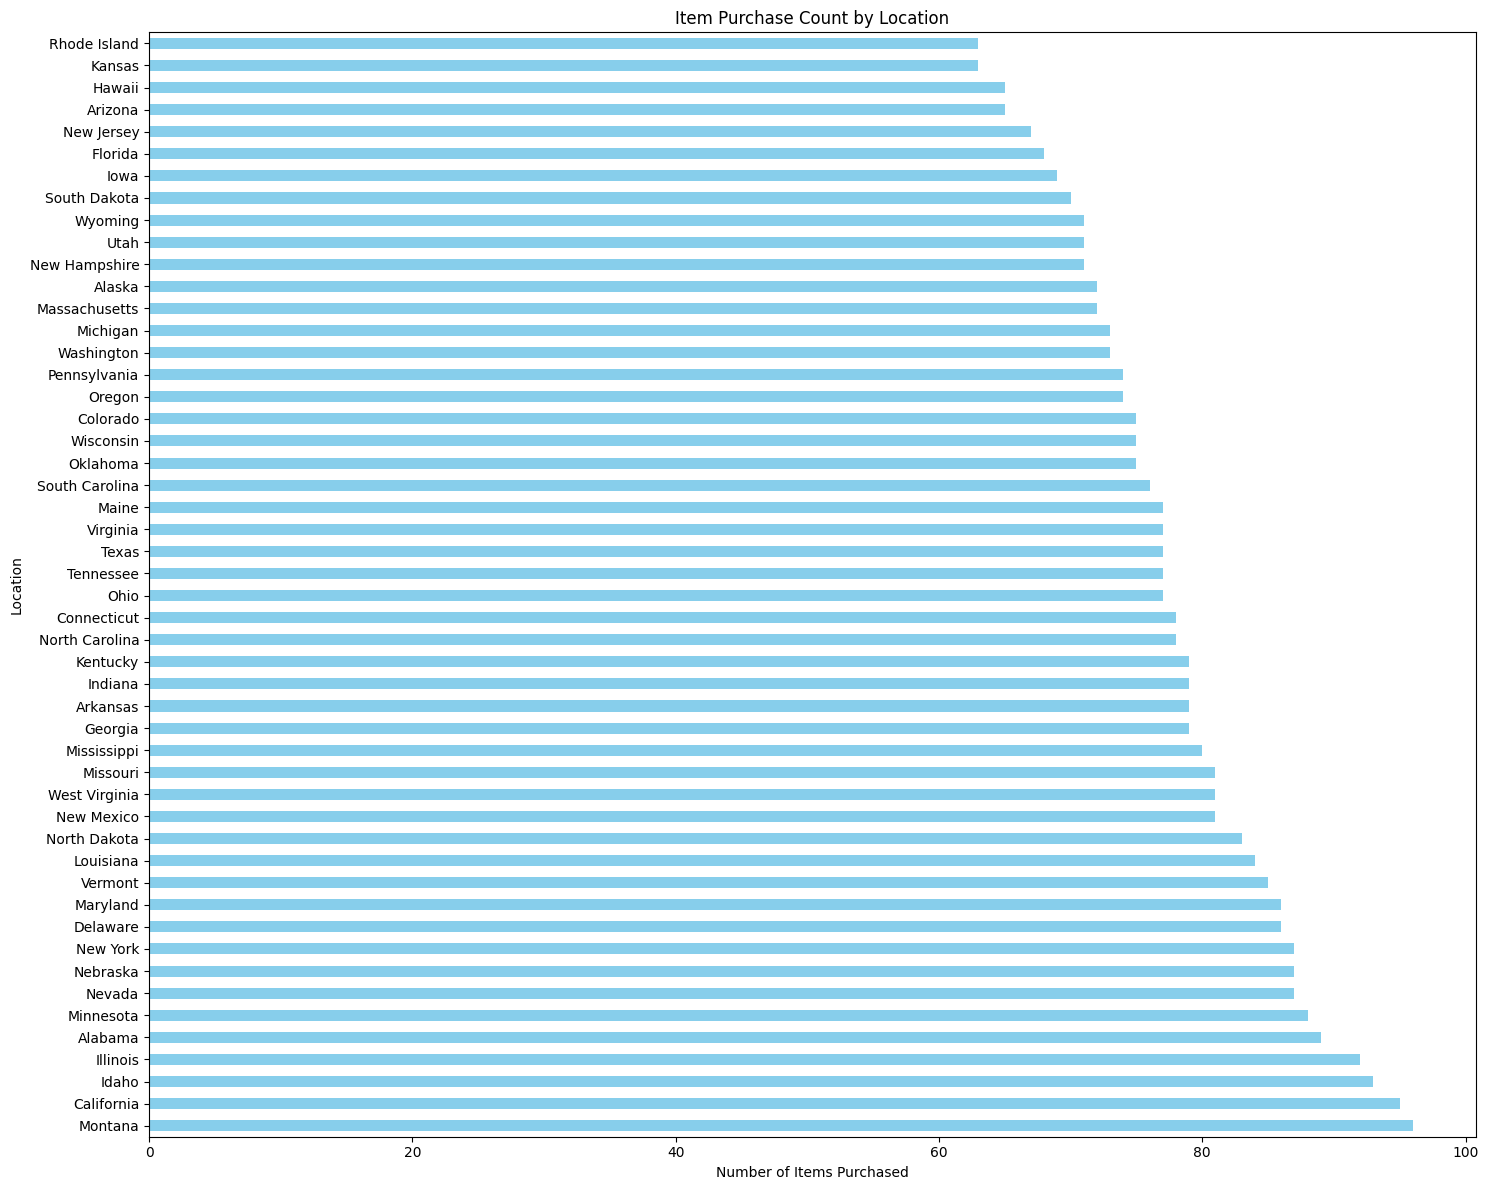

In [36]:
# the total count of items purchases per locations

plt.figure(figsize=(15, 12))
location_counts.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.xlabel('Number of Items Purchased')
plt.title('Item Purchase Count by Location')
plt.tight_layout()
plt.show()

***Average purchased amount by location***

C:\Users\Hemant\AppData\Local\Temp\ipykernel_21536\247755513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Purchase Amount (USD)', data=avg_price_df, palette='viridis')


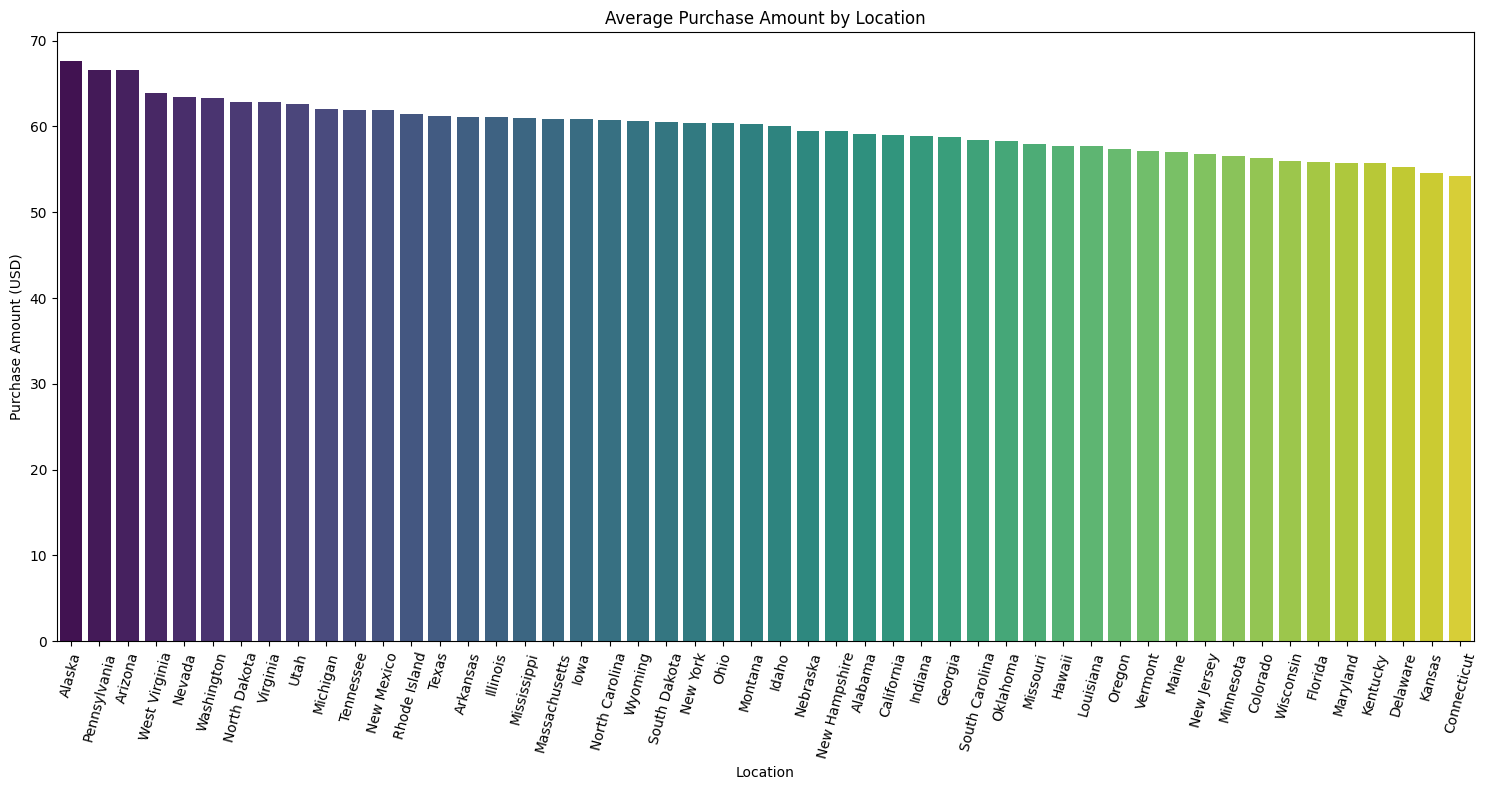

In [37]:
avg_price_df = average_price_by_location.reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='Purchase Amount (USD)', data=avg_price_df, palette='viridis')
plt.title('Average Purchase Amount by Location')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

***Frequency of items purchased***

C:\Users\Hemant\AppData\Local\Temp\ipykernel_21536\1444731129.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


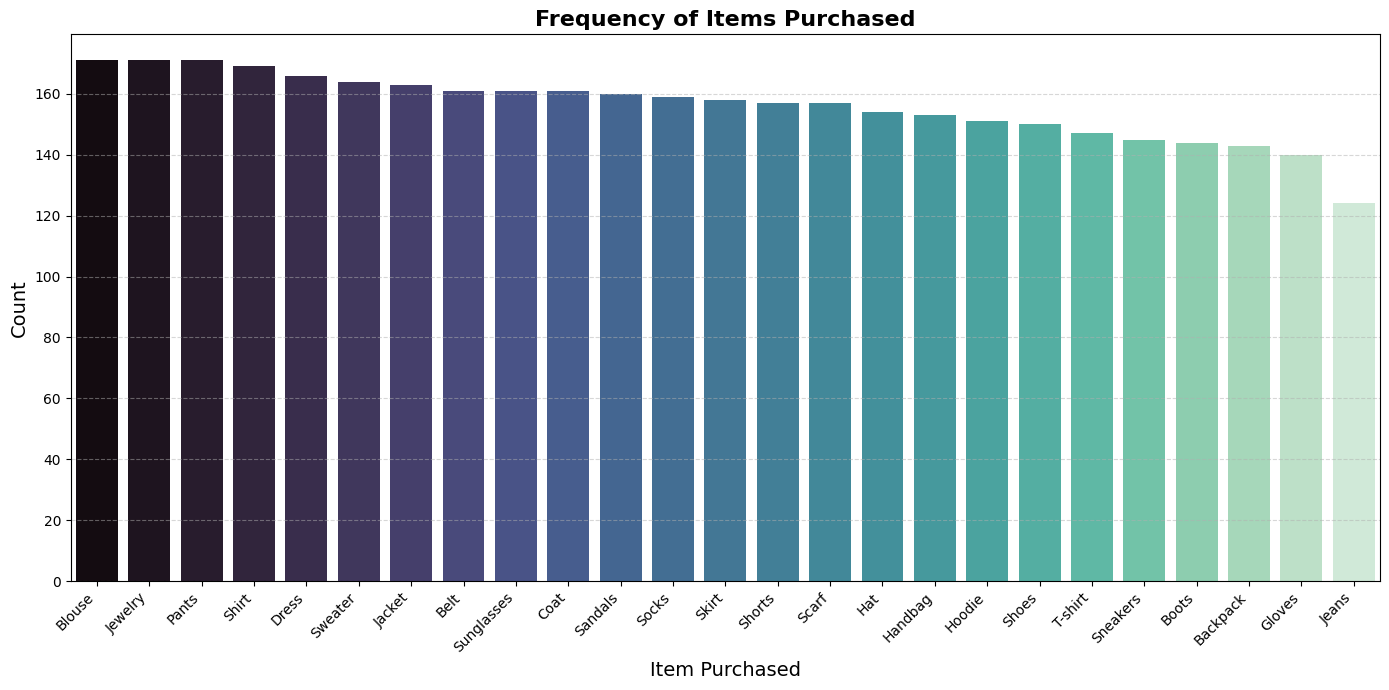

In [38]:
item_counts = df['Item Purchased'].value_counts().reset_index()
item_counts.columns = ['Item Purchased', 'Count']

plt.figure(figsize=(14, 7))
sns.barplot(
    data=item_counts,
    x='Item Purchased',
    y='Count',
    palette='mako'  # You can try 'viridis', 'coolwarm', 'rocket', etc.
)
plt.title('Frequency of Items Purchased', fontsize=16, weight='bold')
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

***Purchased of items as per category on Purchase amount***

C:\Users\Hemant\AppData\Local\Temp\ipykernel_21536\1540288095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)', palette='Set2')


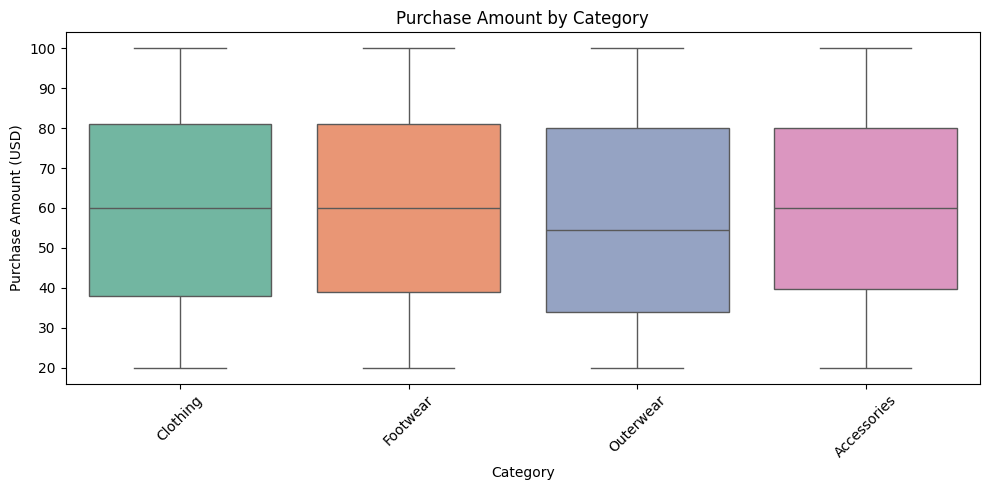

In [39]:
plt.figure(figsize=(10 , 5))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)', palette='Set2')
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Aggregate counts by Item Purchased and Color***

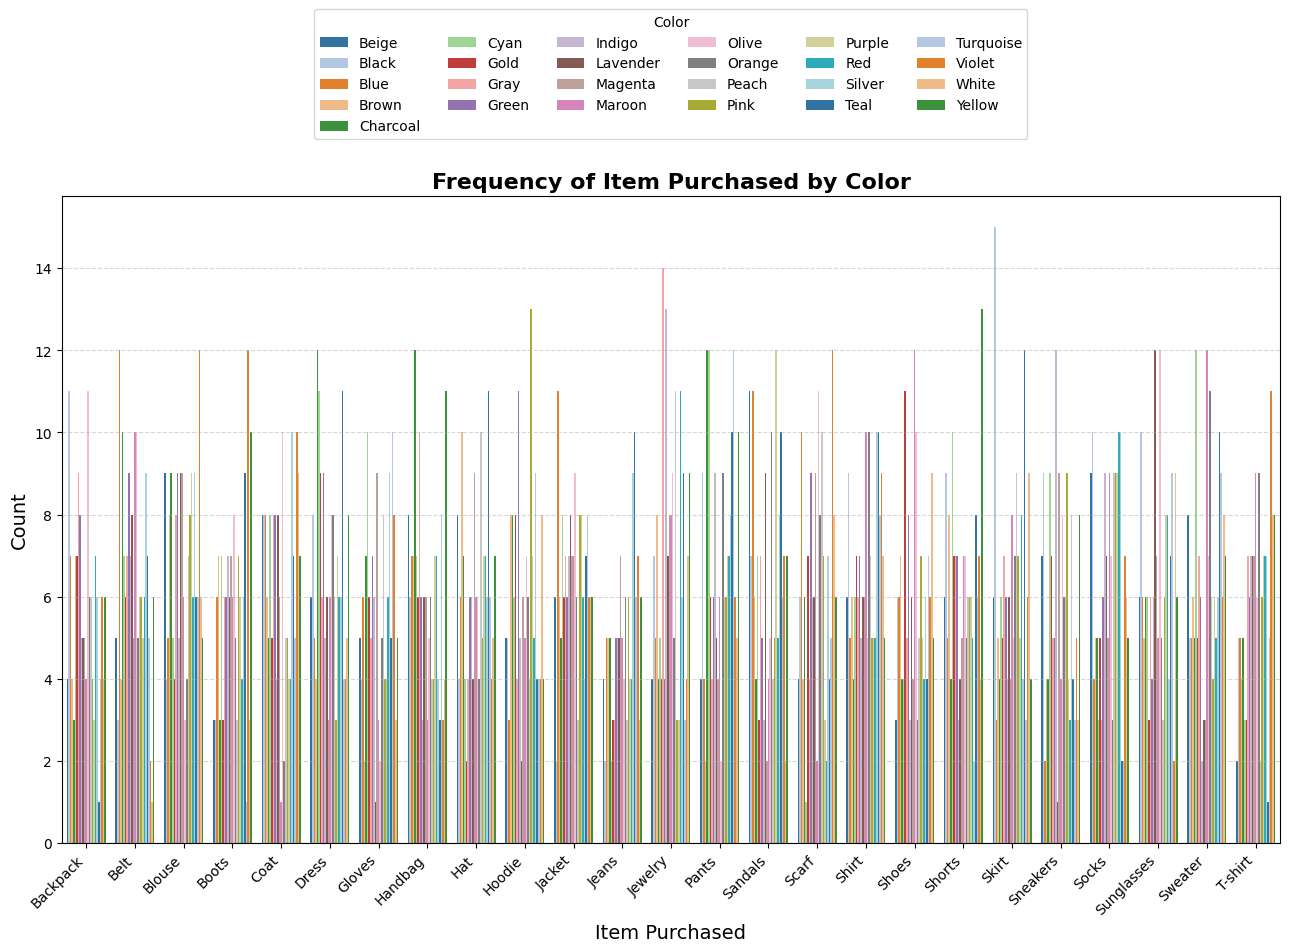

In [40]:
df_counts = df.groupby(['Item Purchased', 'Color']).size().reset_index(name='Count')

plt.figure(figsize=(13, 8))
sns.barplot(
    data=df_counts,
    x='Item Purchased',
    y='Count',       
    hue='Color',      
    palette="tab20"
)

plt.title('Frequency of Item Purchased by Color', fontsize=16, weight='bold')
plt.xlabel("Item Purchased", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Color', bbox_to_anchor=(0.5, 1.30), loc='upper center', ncol=6)
plt.show()

***Frequency of items purchase in Season***

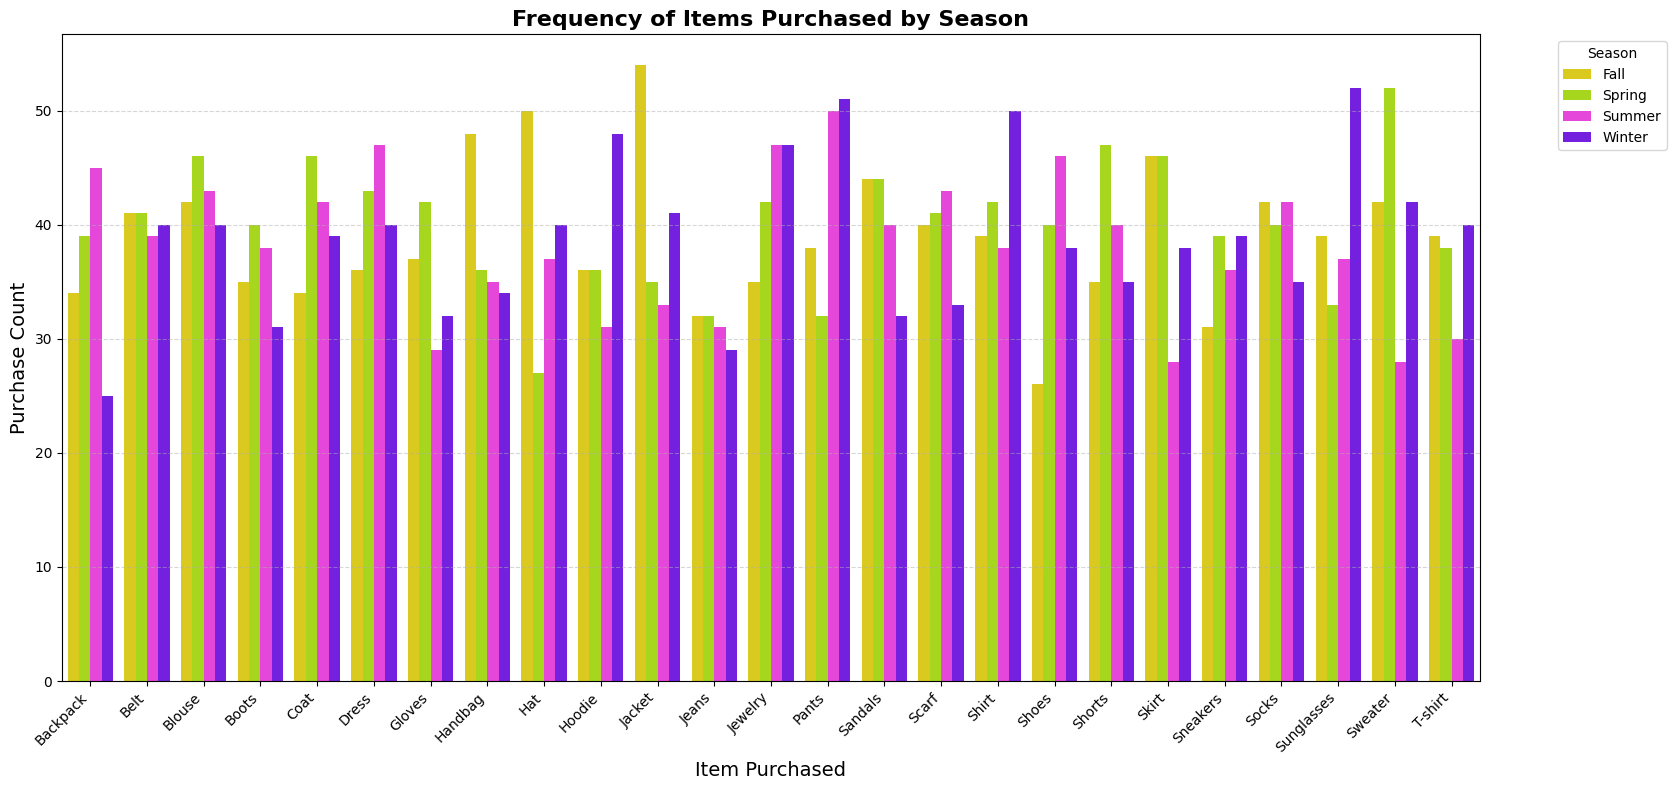

In [41]:


# Aggragate the iems purchase per seasons
df_counts = df.groupby(['Item Purchased', 'Season']).size().reset_index(name='Count')
season_colors = {
    'Winter': '#6F00FF',
    'Spring': '#B6F500',
    'Summer': '#FF2DF1',
    'Fall': '#F9E400'
}

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df_counts,
    x='Item Purchased',
    y='Count',
    hue='Season',
    # marker='o',
    palette=season_colors
)

plt.title('Frequency of Items Purchased by Season', fontsize=16, weight='bold')
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

***Purchased Amount varry by seasons per items***

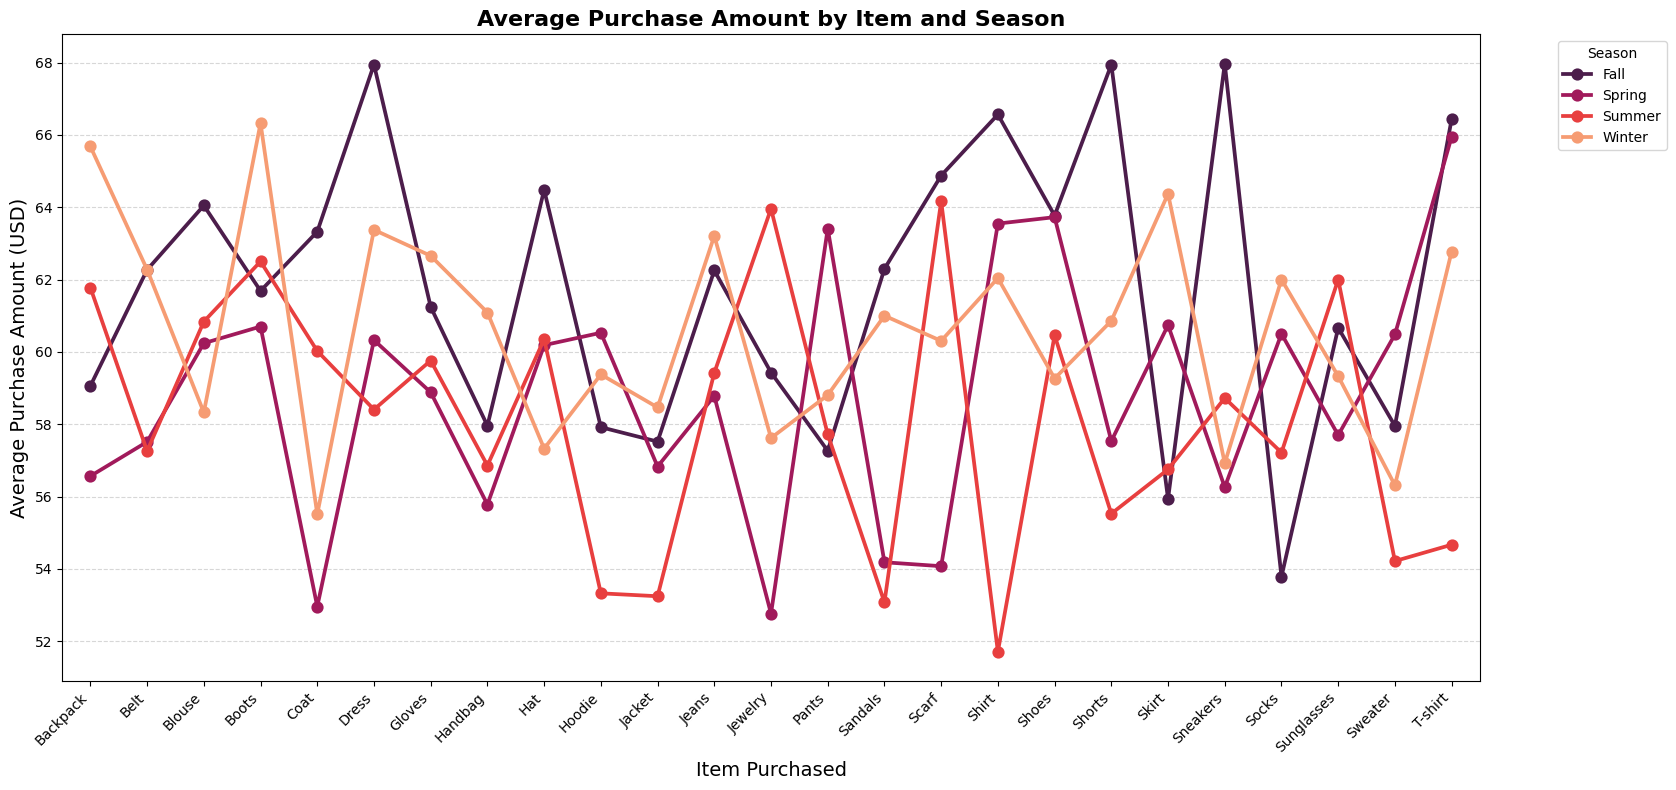

In [42]:
df_counts = df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(15, 8))
# sns.pointplot(data=df_counts,x='Item Purchased',y='Purchase Amount (USD)', hue='Season', marker='o',palette='rocket')
sns.pointplot(
    data=df_counts,
    x='Item Purchased',
    y='Purchase Amount (USD)',
    hue='Season',
    marker='o',
    palette='rocket'
)

plt.title('Average Purchase Amount by Item and Season', fontsize=16, weight='bold')
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

***Review rating boxplot depend on color***

C:\Users\Hemant\AppData\Local\Temp\ipykernel_21536\3270246788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Color', y='Review Rating', palette='Set3')


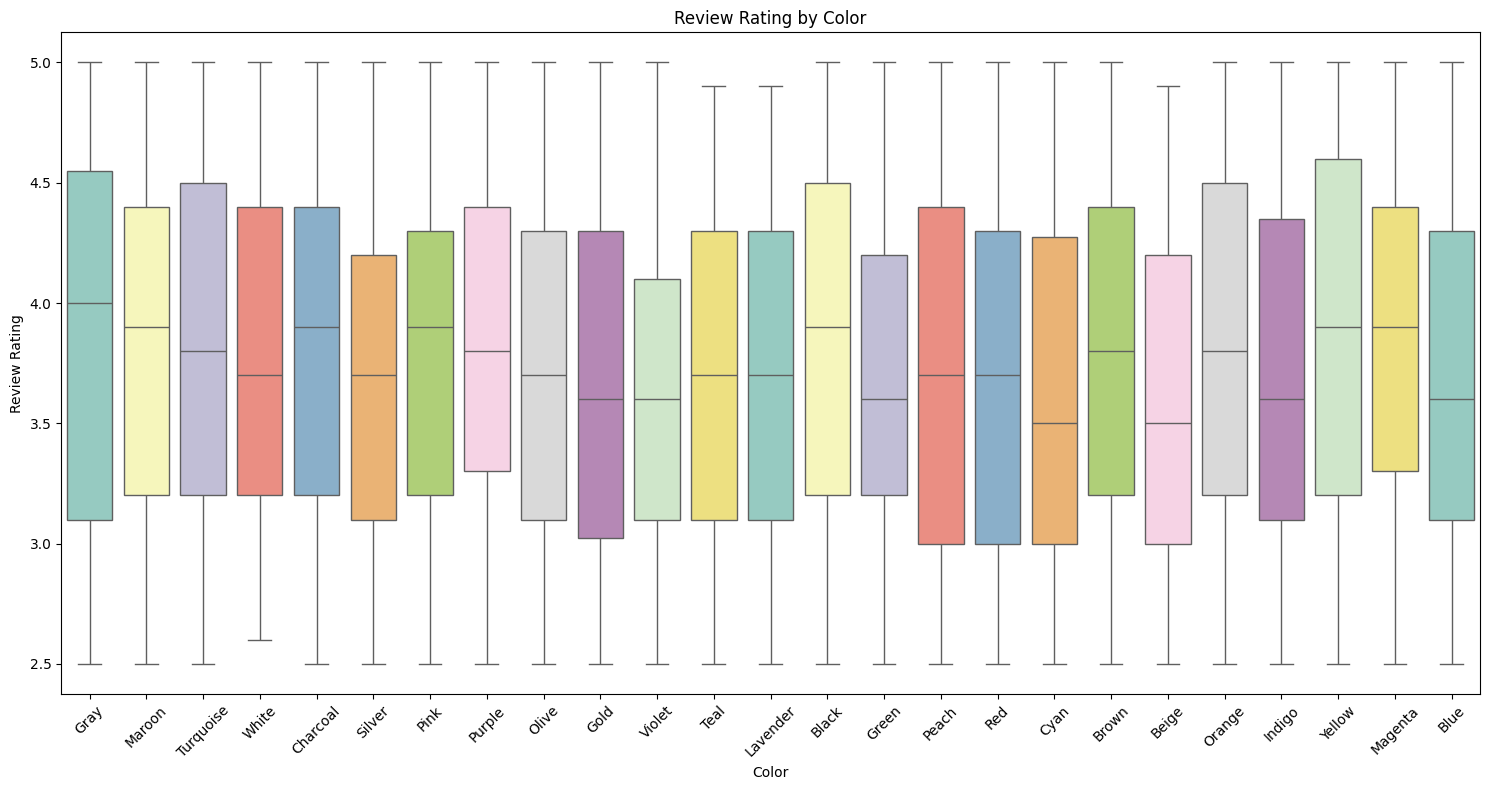

In [43]:
plt.figure(figsize=(15 , 8))
sns.boxplot(data=df, x='Color', y='Review Rating', palette='Set3')
plt.xticks(rotation=45)
plt.title('Review Rating by Color')
plt.tight_layout()
plt.show()


# Data Dustribution and Correlation

In [44]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder , MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [45]:
# Create the new scaled dataset with a copied data of main dataset (df) 

df1 = df.copy()

cols_to_encode = [
    'Gender',
    'Category',
    'Subscription Status',
    'Discount Applied',
    'Promo Code Used',
    'Frequency of Purchases',
    'Size',
    'Season',
    'Payment Method',
    'Shipping Type',
    'Color',
    'Item Purchased',
    'Location'
]

# fit the encoder (OrdinalEncoder)
encoder = OrdinalEncoder()
df1[cols_to_encode] = encoder.fit_transform(df1[cols_to_encode])



In [46]:
df1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1.0,2.0,1.0,53,16.0,0.0,7.0,3.0,3.1,1.0,1.0,1.0,1.0,14,5.0,3.0
1,2,19,1.0,23.0,1.0,64,18.0,0.0,12.0,3.0,3.1,1.0,1.0,1.0,1.0,2,1.0,3.0
2,3,50,1.0,11.0,1.0,73,20.0,2.0,12.0,1.0,3.1,1.0,2.0,1.0,1.0,23,2.0,6.0
3,4,21,1.0,14.0,2.0,90,38.0,1.0,12.0,1.0,3.5,1.0,3.0,1.0,1.0,49,4.0,6.0
4,5,45,1.0,2.0,1.0,49,36.0,1.0,21.0,1.0,2.7,1.0,2.0,1.0,1.0,31,4.0,0.0


<h3> Correlation of scale encoded dataset with heatmap presentation.

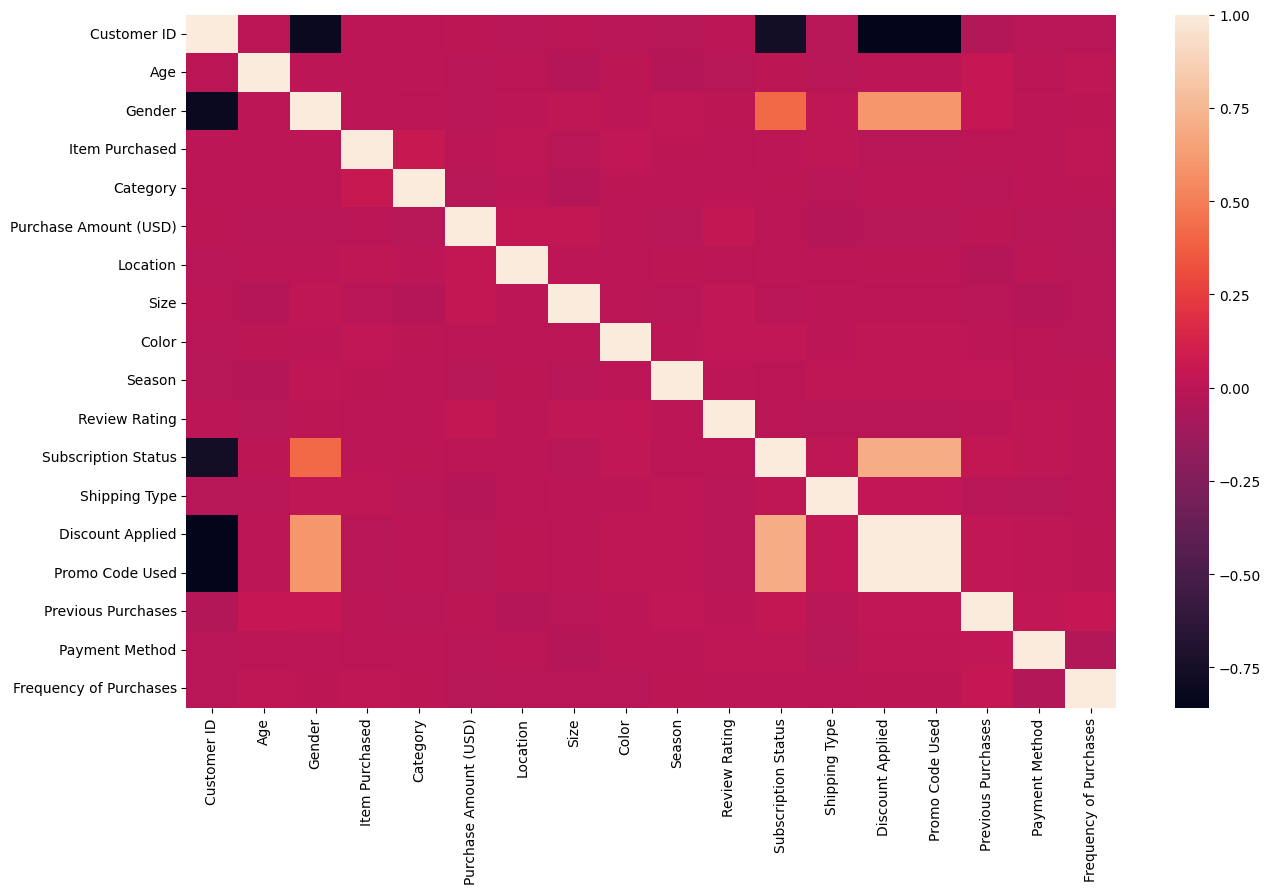

In [47]:
plt.figure(figsize=(15 , 9))
sns.heatmap(df1.corr() , cmap='rocket' )
plt.show()

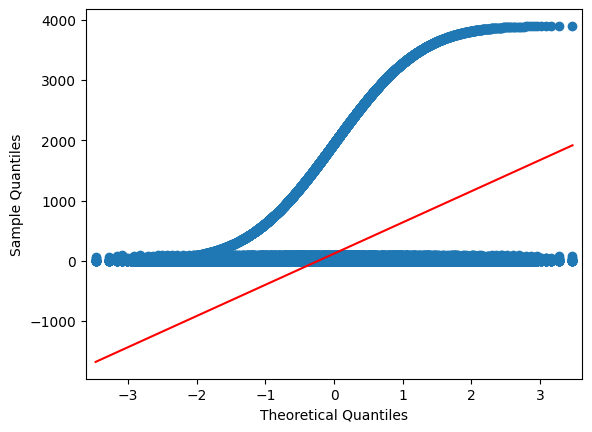

In [48]:
# Whole data distribution 

plt.Figure(figsize=(13 ,8))
sm.qqplot(data = df1 , line = 's')
plt.show()

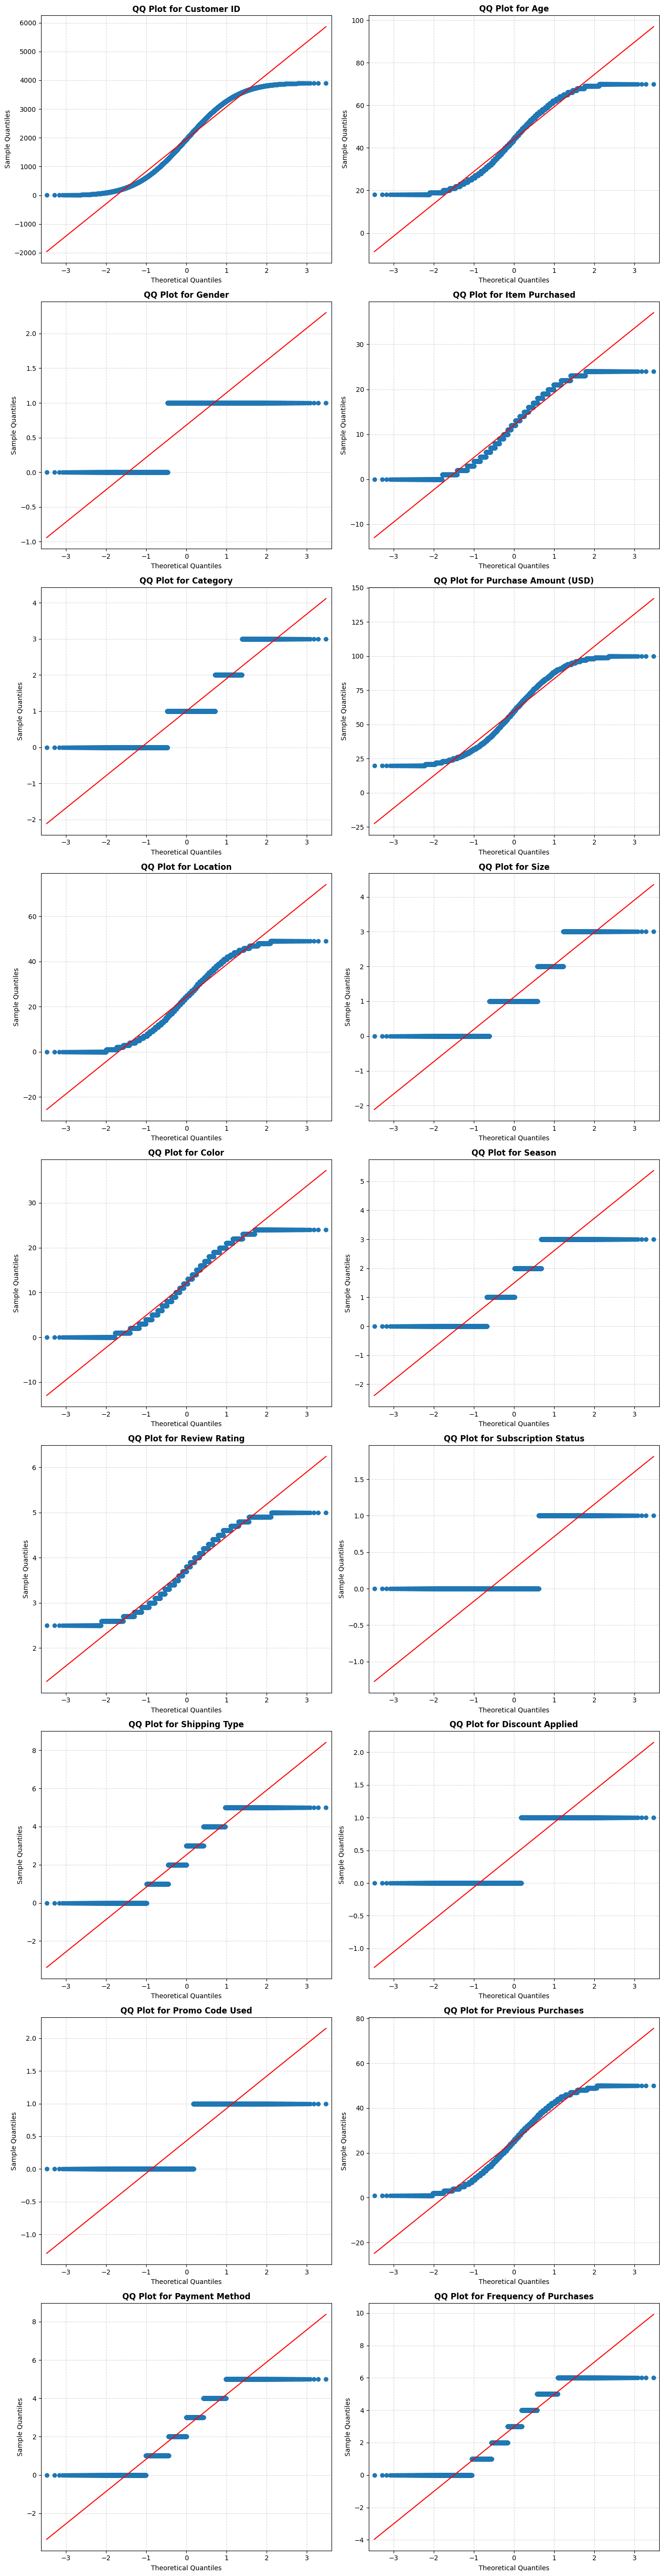

In [49]:
# All data columns skewness distribution


# numeric_cols = df1.select_dtypes(include=[np.number]).columns

# for col in numeric_cols:
#     plt.figure(figsize=(8, 6))
#     stats.probplot(df1[col].dropna(), dist="norm", plot=plt)
#     plt.title(f"QQ Plot for {col}", fontsize=16, weight='bold')
#     plt.grid(True, linestyle='--', alpha=0.5)
#     plt.show()



numeric_cols = df1.select_dtypes(include=[np.number]).columns

num_cols = len(numeric_cols)
rows = int(np.ceil(num_cols / 2))
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sm.qqplot(df1[col].dropna(), line='s', ax=ax)
    ax.set_title(f"QQ Plot for {col}", fontsize=12, weight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<h4>PCA Projection
- Dimensionality Reduction 

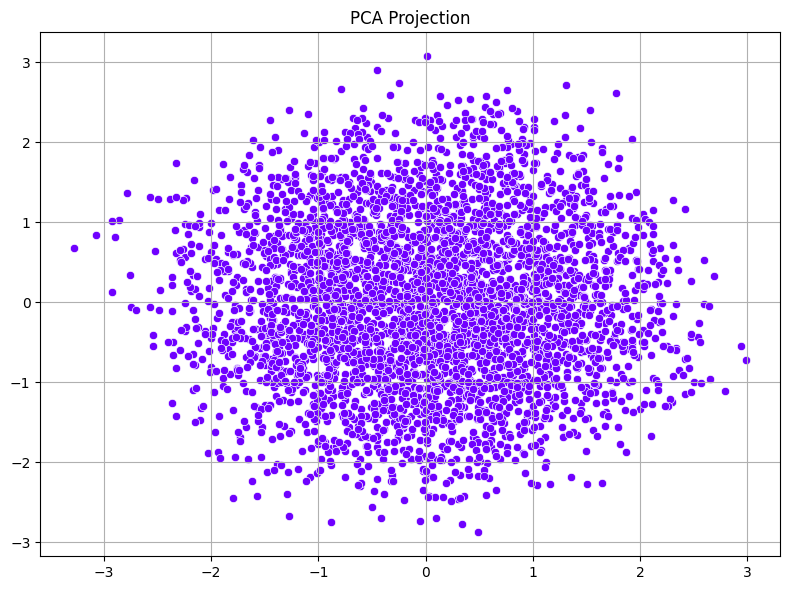

In [ ]:


num_cols = df.select_dtypes(include=['int64', 'float64']).columns

X_scaled = StandardScaler().fit_transform(df[num_cols].dropna())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1] , color = '#6F00FF')
plt.title('PCA Projection')
plt.grid(True)
plt.tight_layout()
plt.show()


***Heatmap representation of corrlation od columns in data***

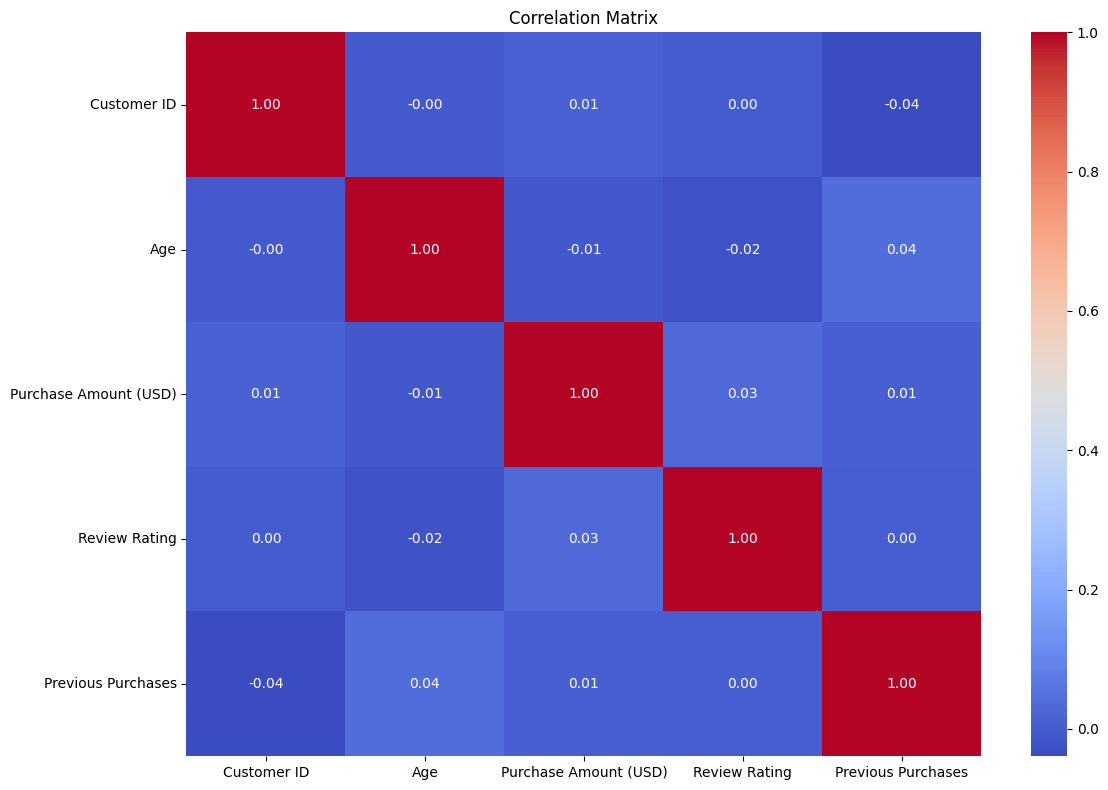

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
